In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,                                   
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'Images/Split/train',
    target_size=(128, 128),
    batch_size=10,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    'Images/Split/test',
    target_size=(128, 128),
    batch_size=10,
    class_mode='binary')

val_set = test_datagen.flow_from_directory(
    'Images/Split/val',
    target_size=(128, 128),
    batch_size=10,
    class_mode='binary')

Found 20060 images belonging to 2 classes.
Found 2510 images belonging to 2 classes.
Found 2507 images belonging to 2 classes.


In [3]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(64, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))
classifier.add(Dropout(0.5))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the Model
classifier.add(Flatten())

# Connecting all layer
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the model
classifier.compile(optimizer = 'sgd',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [4]:
class1 = classifier.fit(
    training_set,
    epochs=500,
    validation_data=val_set)

Epoch 1/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.5025 - accuracy: 0.7762 - val_loss: 0.3601 - val_accuracy: 0.7970
Epoch 2/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.4541 - accuracy: 0.8055 - val_loss: 0.4912 - val_accuracy: 0.8309
Epoch 3/500
2006/2006 [==============================] - 63s 31ms/step - loss: 0.4402 - accuracy: 0.8090 - val_loss: 0.5657 - val_accuracy: 0.8261
Epoch 4/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.4288 - accuracy: 0.8167 - val_loss: 0.5754 - val_accuracy: 0.8361
Epoch 5/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.4166 - accuracy: 0.8205 - val_loss: 0.4407 - val_accuracy: 0.7280
Epoch 6/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.4045 - accuracy: 0.8257 - val_loss: 0.3944 - val_accuracy: 0.8361
Epoch 7/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.3996 - accuracy: 0.8303 - val_loss: 0

2006/2006 [==============================] - 64s 32ms/step - loss: 0.2928 - accuracy: 0.8832 - val_loss: 0.3077 - val_accuracy: 0.8815
Epoch 57/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2914 - accuracy: 0.8832 - val_loss: 0.4094 - val_accuracy: 0.9011
Epoch 58/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2925 - accuracy: 0.8849 - val_loss: 0.2452 - val_accuracy: 0.9051
Epoch 59/500
2006/2006 [==============================] - 65s 33ms/step - loss: 0.2874 - accuracy: 0.8870 - val_loss: 0.3818 - val_accuracy: 0.8396
Epoch 60/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2912 - accuracy: 0.8845 - val_loss: 0.2370 - val_accuracy: 0.9055
Epoch 61/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2895 - accuracy: 0.8855 - val_loss: 0.5545 - val_accuracy: 0.8684
Epoch 62/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2843 - accuracy: 0.8871 - val_loss: 0.3491 

2006/2006 [==============================] - 65s 32ms/step - loss: 0.2552 - accuracy: 0.8996 - val_loss: 0.3108 - val_accuracy: 0.8883
Epoch 112/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2538 - accuracy: 0.8991 - val_loss: 0.1579 - val_accuracy: 0.9039
Epoch 113/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2576 - accuracy: 0.8988 - val_loss: 0.2386 - val_accuracy: 0.8704
Epoch 114/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2550 - accuracy: 0.9011 - val_loss: 0.3792 - val_accuracy: 0.8496
Epoch 115/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2553 - accuracy: 0.8980 - val_loss: 0.1992 - val_accuracy: 0.9087
Epoch 116/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2531 - accuracy: 0.9000 - val_loss: 0.3654 - val_accuracy: 0.8911
Epoch 117/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2507 - accuracy: 0.8997 - val_loss: 0

2006/2006 [==============================] - 64s 32ms/step - loss: 0.2304 - accuracy: 0.9088 - val_loss: 0.2297 - val_accuracy: 0.8927
Epoch 167/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2354 - accuracy: 0.9078 - val_loss: 0.3329 - val_accuracy: 0.9099
Epoch 168/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2296 - accuracy: 0.9094 - val_loss: 0.1919 - val_accuracy: 0.9122
Epoch 169/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2307 - accuracy: 0.9093 - val_loss: 0.2801 - val_accuracy: 0.9087
Epoch 170/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2315 - accuracy: 0.9083 - val_loss: 0.3006 - val_accuracy: 0.9126
Epoch 171/500
2006/2006 [==============================] - 63s 32ms/step - loss: 0.2282 - accuracy: 0.9105 - val_loss: 0.3571 - val_accuracy: 0.8967
Epoch 172/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2289 - accuracy: 0.9099 - val_loss: 0

2006/2006 [==============================] - 64s 32ms/step - loss: 0.2164 - accuracy: 0.9146 - val_loss: 0.3382 - val_accuracy: 0.9003
Epoch 222/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2154 - accuracy: 0.9156 - val_loss: 0.5468 - val_accuracy: 0.8867
Epoch 223/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2191 - accuracy: 0.9127 - val_loss: 0.4099 - val_accuracy: 0.8931
Epoch 224/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2128 - accuracy: 0.9167 - val_loss: 0.1231 - val_accuracy: 0.9118
Epoch 225/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2173 - accuracy: 0.9125 - val_loss: 0.2775 - val_accuracy: 0.9110
Epoch 226/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2176 - accuracy: 0.9151 - val_loss: 0.2305 - val_accuracy: 0.9122
Epoch 227/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2111 - accuracy: 0.9176 - val_loss: 0

2006/2006 [==============================] - 63s 32ms/step - loss: 0.1984 - accuracy: 0.9209 - val_loss: 0.1862 - val_accuracy: 0.8995
Epoch 277/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2009 - accuracy: 0.9215 - val_loss: 0.2255 - val_accuracy: 0.9011
Epoch 278/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2057 - accuracy: 0.9185 - val_loss: 0.2752 - val_accuracy: 0.9039
Epoch 279/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2047 - accuracy: 0.9192 - val_loss: 0.3648 - val_accuracy: 0.9107
Epoch 280/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2017 - accuracy: 0.9206 - val_loss: 0.1810 - val_accuracy: 0.9051
Epoch 281/500
2006/2006 [==============================] - 63s 31ms/step - loss: 0.1983 - accuracy: 0.9217 - val_loss: 0.1758 - val_accuracy: 0.9118
Epoch 282/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2039 - accuracy: 0.9182 - val_loss: 0

2006/2006 [==============================] - 64s 32ms/step - loss: 0.1932 - accuracy: 0.9253 - val_loss: 0.1715 - val_accuracy: 0.9122
Epoch 332/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.1897 - accuracy: 0.9255 - val_loss: 0.6491 - val_accuracy: 0.8827
Epoch 333/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1901 - accuracy: 0.9241 - val_loss: 0.5578 - val_accuracy: 0.8987
Epoch 334/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1933 - accuracy: 0.9247 - val_loss: 0.1287 - val_accuracy: 0.9027
Epoch 335/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1955 - accuracy: 0.9231 - val_loss: 0.1419 - val_accuracy: 0.9214
Epoch 336/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1954 - accuracy: 0.9238 - val_loss: 0.1373 - val_accuracy: 0.9138
Epoch 337/500
2006/2006 [==============================] - 65s 33ms/step - loss: 0.1936 - accuracy: 0.9228 - val_loss: 0

2006/2006 [==============================] - 64s 32ms/step - loss: 0.1809 - accuracy: 0.9281 - val_loss: 0.2156 - val_accuracy: 0.9067
Epoch 387/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1845 - accuracy: 0.9269 - val_loss: 0.4567 - val_accuracy: 0.8795
Epoch 388/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.1804 - accuracy: 0.9313 - val_loss: 0.3157 - val_accuracy: 0.8967
Epoch 389/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1824 - accuracy: 0.9285 - val_loss: 0.4067 - val_accuracy: 0.9150
Epoch 390/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1799 - accuracy: 0.9301 - val_loss: 0.3264 - val_accuracy: 0.8775
Epoch 391/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1809 - accuracy: 0.9289 - val_loss: 0.8704 - val_accuracy: 0.9067
Epoch 392/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.1857 - accuracy: 0.9279 - val_loss: 0

2006/2006 [==============================] - 64s 32ms/step - loss: 0.1766 - accuracy: 0.9301 - val_loss: 0.1362 - val_accuracy: 0.8983
Epoch 442/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1776 - accuracy: 0.9307 - val_loss: 0.0757 - val_accuracy: 0.9031
Epoch 443/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.1787 - accuracy: 0.9290 - val_loss: 0.0726 - val_accuracy: 0.9083
Epoch 444/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1750 - accuracy: 0.9305 - val_loss: 0.1487 - val_accuracy: 0.8971
Epoch 445/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1826 - accuracy: 0.9285 - val_loss: 0.2128 - val_accuracy: 0.9047
Epoch 446/500
2006/2006 [==============================] - 65s 32ms/step - loss: 0.1757 - accuracy: 0.9316 - val_loss: 0.6022 - val_accuracy: 0.9063
Epoch 447/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1733 - accuracy: 0.9322 - val_loss: 0

2006/2006 [==============================] - 64s 32ms/step - loss: 0.1678 - accuracy: 0.9338 - val_loss: 0.1431 - val_accuracy: 0.8967
Epoch 497/500
2006/2006 [==============================] - 63s 31ms/step - loss: 0.1699 - accuracy: 0.9325 - val_loss: 0.3076 - val_accuracy: 0.9071
Epoch 498/500
2006/2006 [==============================] - 63s 31ms/step - loss: 0.1687 - accuracy: 0.9316 - val_loss: 0.2398 - val_accuracy: 0.8971
Epoch 499/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1715 - accuracy: 0.9354 - val_loss: 0.6734 - val_accuracy: 0.8979
Epoch 500/500
2006/2006 [==============================] - 64s 32ms/step - loss: 0.1717 - accuracy: 0.9322 - val_loss: 0.1599 - val_accuracy: 0.9063


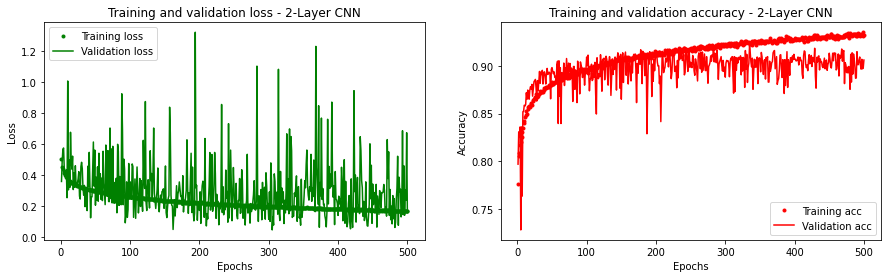

In [5]:
#Extracting CNN Results for Visualization
hist_cnn = class1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Images/Model/cnn1.png')
plt.show()